In [1]:
from scipy.io import loadmat
from scipy.io import savemat
from scipy.stats import kurtosis, skew, entropy
from scipy import signal
import pandas as pd
import numpy as np

mdata = loadmat('dataset/sample_wave.mat')['sample_wave']

Fs = 256
t_range = np.arange(0, 4, 1/Fs)
f_range = np.arange(0, 128, 0.25)
blink_types = mdata.dtype.names # voluntary & involuntary

feature_names = [
    'fp1_mean',
    'fp1_median',
    'fp1_min',
    'fp1_max',
    'fp1_std',
    'fp1_var',
    'fp1_range',
    'fp1_kurtosis',
    'fp1_skew',
    'fp1_entropy',
    'fp2_mean',
    'fp2_median',
    'fp2_min',
    'fp2_max',
    'fp2_std',
    'fp2_var',
    'fp2_range',
    'fp2_kurtosis',
    'fp2_skew',
    'fp2_entropy',


    'fp1_delta_mean',
    'fp1_delta_min',
    'fp1_delta_max',
    'fp1_delta_range',
    'fp1_theta_mean',
    'fp1_theta_min',
    'fp1_theta_max',
    'fp1_theta_range',
    'fp1_alpha_mean',
    'fp1_beta_mean',
    'fp1_gamma_mean',
    'fp2_delta_mean',
    'fp2_delta_min',
    'fp2_delta_max',
    'fp2_delta_range',
    'fp2_theta_mean',
    'fp2_theta_min',
    'fp2_theta_max',
    'fp2_theta_range',
    'fp2_alpha_mean',
    'fp2_beta_mean',
    'fp2_gamma_mean',
    'blink'
]
eeg_bands = {'delta': (0, 4),
             'theta': (4, 8),
             'alpha': (8, 12),
             'beta': (12, 30),
             'gamma': (30, 45)}
features = pd.DataFrame(columns=feature_names)
features['blink'] = features['blink'].astype(int)

for blink_type in blink_types:

    signals = mdata[blink_type][0,0]
    epochs = signals.dtype.names # individual epoch struct

    for epoch in epochs:
        fp1 = signals[epoch][0,0][0]
        fp2 = signals[epoch][0,0][1]


        hist_fp1 = np.histogram(fp1, bins=100, density=True)[0]
        hist_fp1 += 1e-12
        hist_fp2 = np.histogram(fp2, bins=100, density=True)[0]
        hist_fp2 += 1e-12

        f, psd = signal.welch(fp1, Fs, nperseg=1024)

        psd = 10 * np.log10(psd)

        f_delta_indices = np.where((f >= eeg_bands['delta'][0]) & (f < eeg_bands['delta'][1]))
        f_theta_indices = np.where((f >= eeg_bands['theta'][0]) & (f < eeg_bands['theta'][1]))
        f_alpha_indices = np.where((f >= eeg_bands['alpha'][0]) & (f < eeg_bands['alpha'][1]))
        f_beta_indices = np.where((f >= eeg_bands['beta'][0]) & (f < eeg_bands['beta'][1]))
        f_gamma_indices = np.where((f >= eeg_bands['gamma'][0]) & (f < eeg_bands['gamma'][1]))

        fp1_delta_mean = np.mean(psd[f_delta_indices])
        fp1_delta_min = np.min(psd[f_delta_indices])
        fp1_delta_max = np.max(psd[f_delta_indices])
        fp1_delta_range = fp1_delta_max - fp1_delta_min
        fp1_delta_kurtosis = kurtosis(psd[f_delta_indices])
        fp1_delta_skew = skew(psd[f_delta_indices])

        fp1_theta_mean = np.mean(psd[f_theta_indices])
        fp1_theta_min = np.min(psd[f_theta_indices])
        fp1_theta_max = np.max(psd[f_theta_indices])
        fp1_theta_range = fp1_theta_max - fp1_theta_min

        fp1_alpha_mean = np.mean(psd[f_alpha_indices])
        fp1_beta_mean = np.mean(psd[f_beta_indices])
        fp1_gamma_mean = np.mean(psd[f_gamma_indices])

        f, psd = signal.welch(fp2, Fs, nperseg=1024)
        f_delta_indices = np.where((f >= eeg_bands['delta'][0]) & (f < eeg_bands['delta'][1]))
        f_theta_indices = np.where((f >= eeg_bands['theta'][0]) & (f < eeg_bands['theta'][1]))
        f_alpha_indices = np.where((f >= eeg_bands['alpha'][0]) & (f < eeg_bands['alpha'][1]))
        f_beta_indices = np.where((f >= eeg_bands['beta'][0]) & (f < eeg_bands['beta'][1]))
        f_gamma_indices = np.where((f >= eeg_bands['gamma'][0]) & (f < eeg_bands['gamma'][1]))

        fp2_delta_mean = np.mean(psd[f_delta_indices])
        fp2_delta_min = np.min(psd[f_delta_indices])
        fp2_delta_max = np.max(psd[f_delta_indices])
        fp2_delta_range = fp2_delta_max - fp2_delta_min
        fp2_delta_kurtosis = kurtosis(psd[f_delta_indices])
        fp2_delta_skew = skew(psd[f_delta_indices])

        fp2_theta_mean = np.mean(psd[f_theta_indices])
        fp2_theta_min = np.min(psd[f_theta_indices])
        fp2_theta_max = np.max(psd[f_theta_indices])
        fp2_theta_range = fp2_theta_max - fp2_theta_min

        fp2_alpha_mean = np.mean(psd[f_alpha_indices])
        fp2_beta_mean = np.mean(psd[f_beta_indices])
        fp2_gamma_mean = np.mean(psd[f_gamma_indices])

        new_record = {
            'fp1_mean': np.mean(fp1),
            'fp1_median': np.median(fp1),
            'fp1_min': np.min(fp1),
            'fp1_max': np.max(fp1),
            'fp1_std': np.std(fp1),
            'fp1_var': np.var(fp1),
            'fp1_range': np.max(fp1)- np.min(fp1),
            'fp1_kurtosis': kurtosis(fp1),
            'fp1_skew': skew(fp1),
            'fp1_entropy': entropy(hist_fp1),
            'fp2_mean': np.mean(fp2),
            'fp2_median': np.median(fp2),
            'fp2_min': np.min(fp2),
            'fp2_max': np.max(fp2),
            'fp2_std': np.std(fp2),
            'fp2_var': np.var(fp2),
            'fp2_range': np.max(fp2)- np.min(fp2),
            'fp2_kurtosis': kurtosis(fp2),
            'fp2_skew': skew(fp2),
            'fp2_entropy': entropy(hist_fp2),

            'fp1_delta_mean': fp1_delta_mean,
            'fp1_delta_min': fp1_delta_min,
            'fp1_delta_max': fp1_delta_max,
            'fp1_delta_range': fp1_delta_range,
            'fp1_delta_kurtosis': fp1_delta_kurtosis,
            'fp1_delta_skew': fp1_delta_skew,

            'fp1_theta_mean': fp1_theta_mean,
            'fp1_theta_min': fp1_delta_min,
            'fp1_theta_max': fp1_delta_max,
            'fp1_theta_range': fp1_delta_range,
            'fp1_alpha_mean': fp1_alpha_mean,
            'fp1_beta_mean': fp1_beta_mean,
            'fp1_gamma_mean': fp1_gamma_mean,

            'fp2_delta_mean': fp2_delta_mean,
            'fp2_delta_min': fp2_delta_min,
            'fp2_delta_max': fp2_delta_max,
            'fp2_delta_range': fp2_delta_range,
            'fp2_delta_kurtosis': fp2_delta_kurtosis,
            'fp2_delta_skew': fp2_delta_skew,

            'fp2_theta_mean': fp2_theta_mean,
            'fp2_theta_min': fp2_delta_min,
            'fp2_theta_max': fp2_delta_max,
            'fp2_theta_range': fp2_delta_range,
            'fp2_alpha_mean': fp2_alpha_mean,
            'fp2_beta_mean': fp2_beta_mean,
            'fp2_gamma_mean': fp2_gamma_mean,
            'blink': int(1) if blink_type == 'voluntary' else int(0),
        }
        features = pd.concat([features, pd.DataFrame([new_record])], ignore_index=True)


In [2]:
features.to_pickle("features.pkl")
features

,fp1_mean,fp1_median,fp1_min,fp1_max,fp1_std,fp1_var,fp1_range,fp1_kurtosis,fp1_skew,fp1_entropy,...,fp2_theta_max,fp2_theta_range,fp2_alpha_mean,fp2_beta_mean,fp2_gamma_mean,blink,fp1_delta_kurtosis,fp1_delta_skew,fp2_delta_kurtosis,fp2_delta_skew
0,0.019418,0.570297,-153.152054,159.161428,38.554358,1486.438554,312.313482,7.298035,-0.549411,3.126100,...,270.610774,270.610553,0.583066,0.155698,0.124240,1,4.717338,-1.960949,2.793922,2.028205
1,0.035894,0.484288,-96.534364,134.752058,26.791295,717.773509,231.286422,9.168062,0.519797,3.177551,...,160.874791,160.871148,0.414713,0.167889,0.097922,1,2.060242,-1.162094,3.726355,2.321213
2,-0.166985,1.006762,-106.343849,113.392582,26.042569,678.215396,219.736431,8.007002,-0.336855,3.154486,...,175.911650,175.873422,0.353118,0.134826,0.094279,1,-0.134287,-0.162423,3.412964,2.279990
3,-0.331847,0.188234,-105.302602,115.957580,28.010427,784.584047,221.260182,5.830864,-0.359368,3.354138,...,308.922322,308.528438,0.343849,0.146628,0.119668,1,-0.672780,0.694101,2.516011,2.054696
4,0.019691,0.748899,-105.534091,118.844261,27.177089,738.594188,224.378352,7.226644,-0.425924,3.166384,...,199.521143,199.521139,0.473479,0.194503,0.076834,1,5.990088,-2.355106,3.324375,2.242648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,-0.075876,0.393187,-80.309467,120.125675,25.623107,656.543608,200.435142,5.489655,0.333219,3.478472,...,234.714028,234.658982,0.674716,0.198441,0.169411,0,-0.613371,0.281562,2.468336,2.041893
857,0.293096,0.044543,-103.551569,142.618844,29.469183,868.432769,246.170413,8.273008,0.383580,3.184800,...,140.964519,140.844789,0.292998,0.197575,0.116531,0,-0.966976,0.018031,4.317924,2.248094
858,-0.456375,1.613479,-132.117488,123.142924,36.294150,1317.265358,255.260412,4.590602,-0.763368,3.454406,...,557.284893,556.537226,0.607003,0.339298,0.128620,0,-0.641008,0.792211,3.271278,2.245205
859,-0.276722,0.266537,-69.893409,79.104371,19.541324,381.863331,148.997780,4.228456,-0.218180,3.592637,...,196.080046,196.059741,0.447034,0.246213,0.158898,0,-0.545721,-0.163485,4.795568,2.486829


In [3]:
print(features.dtypes)

fp1_mean              float64
fp1_median            float64
fp1_min               float64
fp1_max               float64
fp1_std               float64
fp1_var               float64
fp1_range             float64
fp1_kurtosis          float64
fp1_skew              float64
fp1_entropy           float64
fp2_mean              float64
fp2_median            float64
fp2_min               float64
fp2_max               float64
fp2_std               float64
fp2_var               float64
fp2_range             float64
fp2_kurtosis          float64
fp2_skew              float64
fp2_entropy           float64
fp1_delta_mean        float64
fp1_delta_min         float64
fp1_delta_max         float64
fp1_delta_range       float64
fp1_theta_mean        float64
fp1_theta_min         float64
fp1_theta_max         float64
fp1_theta_range       float64
fp1_alpha_mean        float64
fp1_beta_mean         float64
fp1_gamma_mean        float64
fp2_delta_mean        float64
fp2_delta_min         float64
fp2_delta_

In [4]:
train_x = features.loc[:, features.columns != 'blink']
train_y = features.loc[:, features.columns == 'blink']

In [5]:
from sklearn import preprocessing

def normalize_mms(input_df):
    scaler = preprocessing.RobustScaler()
    result = scaler.fit_transform(input_df)
    return pd.DataFrame(result, index=input_df.index, columns=input_df.columns)

train_x = normalize_mms(train_x)
train_x

,fp1_mean,fp1_median,fp1_min,fp1_max,fp1_std,fp1_var,fp1_range,fp1_kurtosis,fp1_skew,fp1_entropy,...,fp2_theta_min,fp2_theta_max,fp2_theta_range,fp2_alpha_mean,fp2_beta_mean,fp2_gamma_mean,fp1_delta_kurtosis,fp1_delta_skew,fp2_delta_kurtosis,fp2_delta_skew
0,0.050370,0.117143,-1.558826,0.620565,1.110692,1.355208,1.110057,0.005228,-0.928817,-1.015296,...,-0.392358,0.369038,0.370311,0.100041,-0.304362,0.044395,6.495306,-2.819936,-0.386778,-0.943831
1,0.094266,0.012462,-0.279687,0.134300,0.125584,0.125000,0.183767,0.539826,0.143794,-0.788410,...,-0.372358,-0.101723,-0.100293,-0.192540,-0.250397,-0.107157,3.156412,-1.672796,0.391681,0.482872
2,-0.446269,0.648362,-0.501309,-0.291208,0.062882,0.061689,0.051729,0.207906,-0.715585,-0.890121,...,-0.170203,-0.037216,-0.035957,-0.299586,-0.396756,-0.128134,0.398777,-0.237289,0.130042,0.282150
3,-0.885516,-0.347863,-0.477784,-0.240110,0.227682,0.231927,0.069148,-0.414203,-0.738169,-0.009720,...,1.908629,0.533392,0.532918,-0.315693,-0.344514,0.018065,-0.277890,0.992662,-0.618796,-0.814840
4,0.051098,0.334518,-0.483014,-0.182604,0.157893,0.158322,0.104795,-0.015181,-0.804937,-0.837655,...,-0.393626,0.064068,0.065453,-0.090410,-0.132589,-0.228592,8.094637,-3.385937,0.056081,0.100324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,-0.203526,-0.098415,0.086875,-0.157076,0.027753,0.027005,-0.168920,-0.511746,-0.043378,0.538553,...,-0.071906,0.215043,0.216137,0.259318,-0.115159,0.304505,-0.203238,0.400265,-0.658599,-0.877178
857,0.779538,-0.522748,-0.438224,0.291016,0.349846,0.366122,0.353919,0.283951,0.007144,-0.756448,...,0.306182,-0.187137,-0.186173,-0.404068,-0.118991,0.000000,-0.647575,0.021839,0.885564,0.126843
858,-1.217298,1.386791,-1.083601,-0.096969,0.921409,1.084455,0.457834,-0.768765,-1.143455,0.432428,...,3.976521,1.598854,1.596474,0.141641,0.508363,0.069616,-0.237966,1.133546,0.011752,0.112775
859,-0.738644,-0.252560,0.322200,-0.974272,-0.481571,-0.412607,-0.756945,-0.872294,-0.596532,1.041980,...,-0.274965,0.049305,0.050609,-0.136369,0.096313,0.243967,-0.118228,-0.238814,1.284334,1.289279


In [6]:
import sys
sys.path.append("../../function")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from function import classification

metrics = [
    'model',
    'accuracy'
]
results = pd.DataFrame(columns=metrics)

C:\Software\anaconda3\envs\bcifinal1\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train acc: 0.7840531561461794
[[210  65]
 [ 65 262]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       275
           1       0.80      0.80      0.80       327

    accuracy                           0.78       602
   macro avg       0.78      0.78      0.78       602
weighted avg       0.78      0.78      0.78       602


Test acc: 0.7335907335907336
[[ 88  31]
 [ 38 102]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       119
           1       0.77      0.73      0.75       140

    accuracy                           0.73       259
   macro avg       0.73      0.73      0.73       259
weighted avg       0.74      0.73      0.73       259



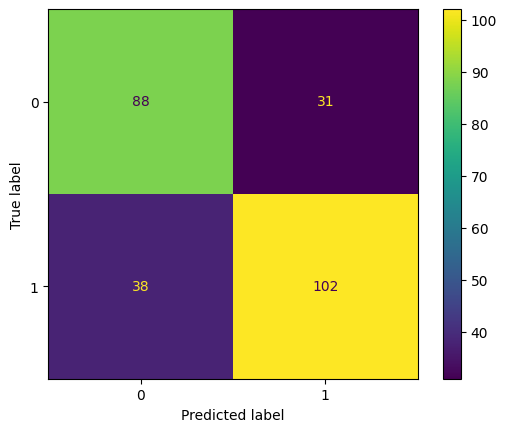

In [7]:
LR = LogisticRegression(random_state=42)
accuracy, LR = classification.model_training(train_x, train_y.values.ravel(), LR)
results = pd.concat([results, pd.DataFrame([{'model': 'Logistic Regression', 'accuracy': accuracy}])], ignore_index=True)

C:\Users\Edwin Sanjaya\DataspellProjects\bci-finalproject\function\classification.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Train acc: 1.0
[[275   0]
 [  0 327]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      1.00      1.00       327

    accuracy                           1.00       602
   macro avg       1.00      1.00      1.00       602
weighted avg       1.00      1.00      1.00       602


Test acc: 0.7451737451737451
[[ 89  30]
 [ 36 104]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       119
           1       0.78      0.74      0.76       140

    accuracy                           0.75       259
   macro avg       0.74      0.75      0.74       259
weighted avg       0.75      0.75      0.75       259



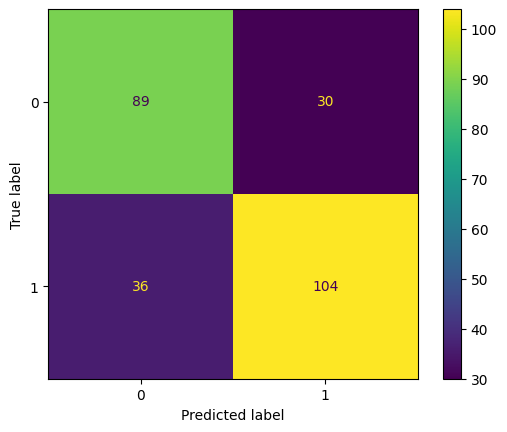

In [8]:
RF = RandomForestClassifier(random_state=42)
accuracy, RF = classification.model_training(train_x, train_y, RF)
results = pd.concat([results, pd.DataFrame([{'model': 'Random Forest', 'accuracy': accuracy}])], ignore_index=True)

Train acc: 0.8504983388704319
[[233  42]
 [ 48 279]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       275
           1       0.87      0.85      0.86       327

    accuracy                           0.85       602
   macro avg       0.85      0.85      0.85       602
weighted avg       0.85      0.85      0.85       602


Test acc: 0.7297297297297297
[[ 86  33]
 [ 37 103]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       119
           1       0.76      0.74      0.75       140

    accuracy                           0.73       259
   macro avg       0.73      0.73      0.73       259
weighted avg       0.73      0.73      0.73       259



C:\Software\anaconda3\envs\bcifinal1\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


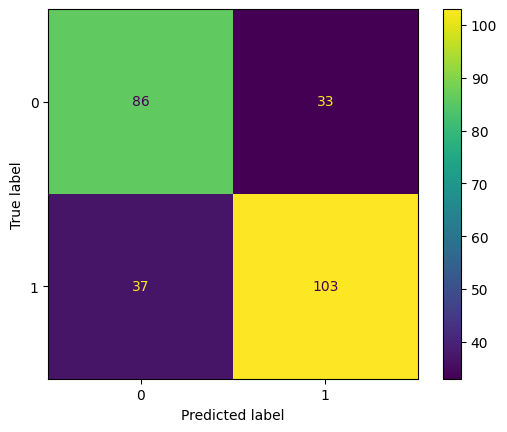

In [9]:
SVM = SVC(random_state=42)
accuracy, SVM = classification.model_training(train_x, train_y, SVM)
results = pd.concat([results, pd.DataFrame([{'model': 'Support Vector Machine', 'accuracy': accuracy}])], ignore_index=True)

Train acc: 1.0
[[275   0]
 [  0 327]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      1.00      1.00       327

    accuracy                           1.00       602
   macro avg       1.00      1.00      1.00       602
weighted avg       1.00      1.00      1.00       602


Test acc: 0.752895752895753
[[ 88  31]
 [ 33 107]]
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       119
           1       0.78      0.76      0.77       140

    accuracy                           0.75       259
   macro avg       0.75      0.75      0.75       259
weighted avg       0.75      0.75      0.75       259



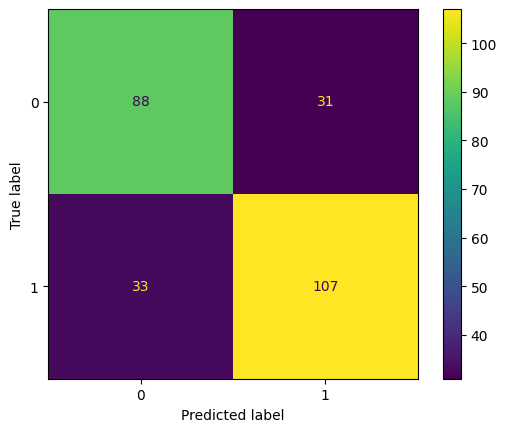

In [10]:
XGB = XGBClassifier()
accuracy, XGB = classification.model_training(train_x, train_y, XGB)
results = pd.concat([results, pd.DataFrame([{'model': 'XGBoost', 'accuracy': accuracy}])], ignore_index=True)

Train acc: 0.9451827242524917
[[263  12]
 [ 21 306]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       275
           1       0.96      0.94      0.95       327

    accuracy                           0.95       602
   macro avg       0.94      0.95      0.94       602
weighted avg       0.95      0.95      0.95       602


Test acc: 0.7027027027027027
[[ 78  41]
 [ 36 104]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       119
           1       0.72      0.74      0.73       140

    accuracy                           0.70       259
   macro avg       0.70      0.70      0.70       259
weighted avg       0.70      0.70      0.70       259



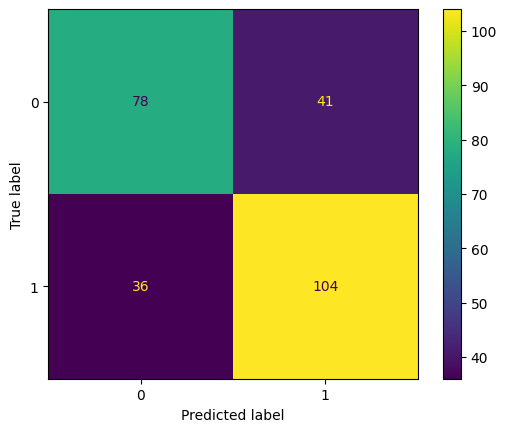

In [11]:
XGBRF = XGBRFClassifier()
accuracy, XGBRF = classification.model_training(train_x, train_y, XGBRF)
results = pd.concat([results, pd.DataFrame([{'model': 'XGBoost Random Forest', 'accuracy': accuracy}])], ignore_index=True)

Train acc: 0.8106312292358804
[[215  60]
 [ 54 273]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       275
           1       0.82      0.83      0.83       327

    accuracy                           0.81       602
   macro avg       0.81      0.81      0.81       602
weighted avg       0.81      0.81      0.81       602


Test acc: 0.7374517374517374
[[ 86  33]
 [ 35 105]]
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       119
           1       0.76      0.75      0.76       140

    accuracy                           0.74       259
   macro avg       0.74      0.74      0.74       259
weighted avg       0.74      0.74      0.74       259



C:\Software\anaconda3\envs\bcifinal1\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


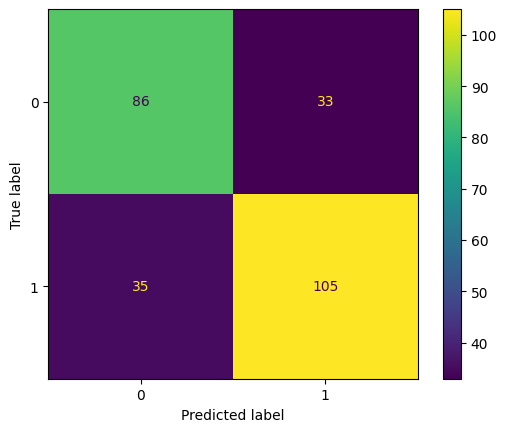

In [12]:
LDA = LinearDiscriminantAnalysis()
accuracy, LDA = classification.model_training(train_x, train_y, LDA)
results = pd.concat([results, pd.DataFrame([{'model': 'Linear Discriminant Analysis', 'accuracy': accuracy}])], ignore_index=True)

C:\Software\anaconda3\envs\bcifinal1\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train acc: 0.8521594684385382
[[217  58]
 [ 31 296]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       275
           1       0.84      0.91      0.87       327

    accuracy                           0.85       602
   macro avg       0.86      0.85      0.85       602
weighted avg       0.85      0.85      0.85       602


Test acc: 0.7104247104247104
[[ 76  43]
 [ 32 108]]
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       119
           1       0.72      0.77      0.74       140

    accuracy                           0.71       259
   macro avg       0.71      0.71      0.71       259
weighted avg       0.71      0.71      0.71       259



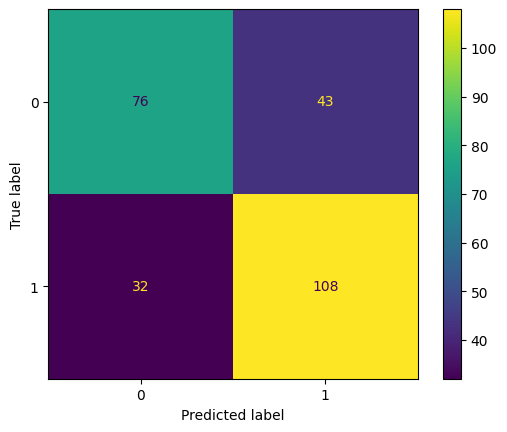

In [13]:
KNC = KNeighborsClassifier()
accuracy, KNC = classification.model_training(train_x, train_y, KNC)
results = pd.concat([results, pd.DataFrame([{'model': 'K-Neighbors Classifier', 'accuracy': accuracy}])], ignore_index=True)

In [14]:
results

,model,accuracy
0,Logistic Regression,0.733591
1,Random Forest,0.745174
2,Support Vector Machine,0.729730
3,XGBoost,0.752896
4,XGBoost Random Forest,0.702703
5,Linear Discriminant Analysis,0.737452
6,K-Neighbors Classifier,0.710425


Index(['fp1_mean', 'fp1_median', 'fp1_min', 'fp1_max', 'fp1_std', 'fp1_var',
       'fp1_range', 'fp1_kurtosis', 'fp1_skew', 'fp1_entropy', 'fp2_mean',
       'fp2_median', 'fp2_min', 'fp2_max', 'fp2_std', 'fp2_var', 'fp2_range',
       'fp2_kurtosis', 'fp2_skew', 'fp2_entropy', 'fp1_delta_mean',
       'fp1_delta_min', 'fp1_delta_max', 'fp1_delta_range', 'fp1_theta_mean',
       'fp1_theta_min', 'fp1_theta_max', 'fp1_theta_range', 'fp1_alpha_mean',
       'fp1_beta_mean', 'fp1_gamma_mean', 'fp2_delta_mean', 'fp2_delta_min',
       'fp2_delta_max', 'fp2_delta_range', 'fp2_theta_mean', 'fp2_theta_min',
       'fp2_theta_max', 'fp2_theta_range', 'fp2_alpha_mean', 'fp2_beta_mean',
       'fp2_gamma_mean', 'fp1_delta_kurtosis', 'fp1_delta_skew',
       'fp2_delta_kurtosis', 'fp2_delta_skew'],
      dtype='object')
[False False  True False  True False False False False False False False
  True False False  True  True  True False False  True False False False
 False False False False False F

C:\Software\anaconda3\envs\bcifinal1\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Software\anaconda3\envs\bcifinal1\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


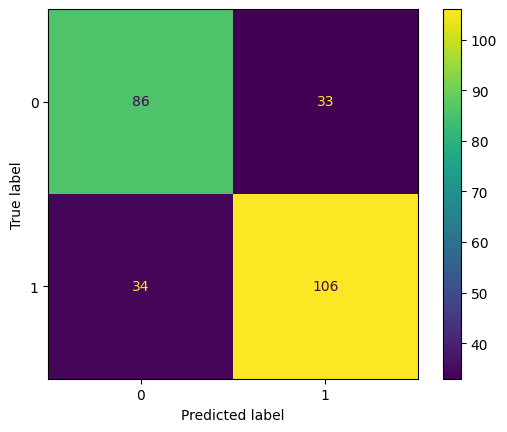

In [15]:
rfe_model = XGB

rfe_columns = classification.RFE_analysis(train_x, train_y, rfe_model, n_feature_to_select=0.2)
train_x_rfe = train_x[train_x.columns[rfe_columns]]
rfe_model = classification.model_training(train_x_rfe, train_y, rfe_model)

In [16]:
rfe_columns

array([ 2,  4, 12, 15, 16, 17, 20, 44, 45], dtype=int64)

In [17]:
train_x.columns

Index(['fp1_mean', 'fp1_median', 'fp1_min', 'fp1_max', 'fp1_std', 'fp1_var',
       'fp1_range', 'fp1_kurtosis', 'fp1_skew', 'fp1_entropy', 'fp2_mean',
       'fp2_median', 'fp2_min', 'fp2_max', 'fp2_std', 'fp2_var', 'fp2_range',
       'fp2_kurtosis', 'fp2_skew', 'fp2_entropy', 'fp1_delta_mean',
       'fp1_delta_min', 'fp1_delta_max', 'fp1_delta_range', 'fp1_theta_mean',
       'fp1_theta_min', 'fp1_theta_max', 'fp1_theta_range', 'fp1_alpha_mean',
       'fp1_beta_mean', 'fp1_gamma_mean', 'fp2_delta_mean', 'fp2_delta_min',
       'fp2_delta_max', 'fp2_delta_range', 'fp2_theta_mean', 'fp2_theta_min',
       'fp2_theta_max', 'fp2_theta_range', 'fp2_alpha_mean', 'fp2_beta_mean',
       'fp2_gamma_mean', 'fp1_delta_kurtosis', 'fp1_delta_skew',
       'fp2_delta_kurtosis', 'fp2_delta_skew'],
      dtype='object')

In [18]:
train_x.columns[rfe_columns]

Index(['fp1_min', 'fp1_std', 'fp2_min', 'fp2_var', 'fp2_range', 'fp2_kurtosis',
       'fp1_delta_mean', 'fp2_delta_kurtosis', 'fp2_delta_skew'],
      dtype='object')